Welcome to my board game geek analysis!

In [1]:
#importing libraries to use within this analysis
import pandas as pd
import matplotlib.pyplot as plt
import collections
import numpy as np
%matplotlib inline

The data used within this analysis is provided on the Kaggle platform and is taken from Board Game Geek (BGG). The link for the dataset can be found here: https://www.kaggle.com/mrpantherson/board-game-data

In [2]:
#reading board game geek data into a pandas dataframe and reading the first 5 rows
bg_data = pd.read_csv("bgg_db_1806.csv")
print(bg_data.head(5))

   rank                                            bgg_url  game_id  \
0     1  https://boardgamegeek.com/boardgame/174430/glo...   174430   
1     2  https://boardgamegeek.com/boardgame/161936/pan...   161936   
2     3  https://boardgamegeek.com/boardgame/182028/thr...   182028   
3     4  https://boardgamegeek.com/boardgame/167791/ter...   167791   
4     5  https://boardgamegeek.com/boardgame/12333/twil...    12333   

                                           names  min_players  max_players  \
0                                     Gloomhaven            1            4   
1                      Pandemic Legacy: Season 1            2            4   
2  Through the Ages: A New Story of Civilization            2            4   
3                              Terraforming Mars            1            5   
4                              Twilight Struggle            2            2   

   avg_time  min_time  max_time  year  avg_rating  geek_rating  num_votes  \
0       120        60      

In [3]:
#display summary data about the board game dataset
print(bg_data.dtypes)
print("==============")
print("The shape of the dataset is {shape}".format(shape = bg_data.shape))

rank             int64
bgg_url         object
game_id          int64
names           object
min_players      int64
max_players      int64
avg_time         int64
min_time         int64
max_time         int64
year             int64
avg_rating     float64
geek_rating    float64
num_votes        int64
image_url       object
age              int64
mechanic        object
owned            int64
category        object
designer        object
weight         float64
dtype: object
The shape of the dataset is (4999, 20)


In [4]:
#display descriptive statistics for the dataset
bg_data.describe()

,rank,game_id,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,owned,weight
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2500.000000,89130.612523,2.019404,5.188038,116.193639,83.852971,115.717544,1997.739948,6.969392,6.088576,2013.458292,10.407281,3063.863573,2.343633
std,1443.231328,77203.598778,0.685282,7.801038,513.710907,317.251581,513.768868,143.192968,0.562825,0.483212,4750.834210,3.237645,6482.861008,0.808694
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,5.777730,5.640240,62.000000,0.000000,49.000000,0.000000
25%,1250.500000,11169.000000,2.000000,4.000000,30.000000,30.000000,30.000000,2003.000000,6.540560,5.726970,285.000000,8.000000,626.000000,1.735300
50%,2500.000000,71906.000000,2.000000,4.000000,60.000000,45.000000,60.000000,2010.000000,6.907890,5.905240,625.000000,11.000000,1204.000000,2.285700
75%,3749.500000,160456.500000,2.000000,6.000000,120.000000,90.000000,120.000000,2015.000000,7.339040,6.303585,1634.500000,12.000000,2751.500000,2.888900
max,4999.000000,248949.000000,8.000000,200.000000,22500.000000,17280.000000,22500.000000,2018.000000,9.159150,8.618580,77423.000000,42.000000,111807.000000,4.904800


Given that I am looking to create my own board game, I am going to analyze the the most common *mechanic* used across games

In [5]:
#Display information about the mechanics available
raw_mechs = bg_data["mechanic"].value_counts()
print(raw_mechs)
print("=========================")
print(len(raw_mechs))

none                                                                                                                                           162
Hex-and-Counter                                                                                                                                114
Hand Management                                                                                                                                 94
Dice Rolling, Hex-and-Counter                                                                                                                   76
Dice Rolling, Hex-and-Counter, Simulation                                                                                                       65
Hand Management, Set Collection                                                                                                                 56
Dice Rolling                                                                                                          

**Analysis:** Looking at the above output, there are 2314 unique types inside of the "mechanic" series. This is likely due to games having multiple mechanics tagged as can see above in the first record of our data. In order to get a better understanding of the gaming landscape, the mechanics list will need to be broken up and counted separetly. By separating the mechanic tags, we can then understand the unique tags within the system and run analysis thereafter

### Defining Functions for Use
Below we will be defining functions which will aid our data cleaning and analysis efforts. What is tricky about the data set provided and columns we will be looking at is that the `mechanic` and `category` columsn contain a comma separated list inside, which pandas does not handle well for analysis. We will need to create a separate object (data frame or list of list) to properly analyze this data and construct visualizations

In [6]:
def expand_series(df, s, n):
    #funciton that takes a dataframe and a series name (string) of a series in the dataframe with a comma separated 
    #list as its entries, splits them, and creates a new 2D-list as an output
    series_frame = []
    for i in n:
        mechanic = df.loc[i,s]
        mech = mechanic.split(", ")
        series_frame.append(mech)
    return series_frame

def get_values(twoD_list, unique = False):
    #function which takes a 2D list and returns the values in a list.
    #An optional parameter will allow for the filter of unique values in the list
    my_list = []
    for i in range(len(twoD_list)):
        for item in twoD_list[i]:
            my_list.append(item)
    my_list = pd.Series(my_list)
    if unique:
        u = list(my_list.unique())
        return u
    else:
        return list(my_list)

def bool_mask (twoD_list, look_up):
    #function which takes a 2D-list and look up string and outputs a boolean list used to perform
    #boolean mask list comprehentions using the pandas library
    bool_list = []
    for i in range(len(twoD_list)):
        bool_list.append(look_up in twoD_list[i])
    return bool_list

In [11]:
#Creating a 2D array mapping out the list of categories for each game in the BGG dataset 
cat_frame = expand_series(bg_data, "category", range(4999))

#Create a list of the unique categories tagged in BGG
categories = get_values(cat_frame, unique = True)
categories

['Adventure',
 'Exploration',
 'Fantasy',
 'Fighting',
 'Miniatures',
 'Environmental',
 'Medical',
 'Card Game',
 'Civilization',
 'Economic',
 'Industry / Manufacturing',
 'Science Fiction',
 'Territory Building',
 'Modern Warfare',
 'Political',
 'Wargame',
 'Movies / TV / Radio theme',
 'American West',
 'Horror',
 'Dice',
 'Medieval',
 'Ancient',
 'City Building',
 'Novel-based',
 'Animals',
 'Farming',
 'Collectible Components',
 'Murder/Mystery',
 'Puzzle',
 'Nautical',
 'Mythology',
 'Video Game Theme',
 'Religious',
 'Travel',
 'Negotiation',
 'Space Exploration',
 'Mature / Adult',
 'Transportation',
 'Bluffing',
 'Abstract Strategy',
 'Renaissance',
 'Deduction',
 'Party Game',
 'Spies/Secret Agents',
 'Word Game',
 'Age of Reason',
 'Arabian',
 'Prehistoric',
 'Aviation / Flight',
 'Zombies',
 'Post-Napoleonic',
 'Trains',
 'Action / Dexterity',
 'Real-time',
 'World War I',
 'World War II',
 'Comic Book / Strip',
 'Humor',
 'Racing',
 'Civil War',
 'Electronic',
 'Book',
 

I am particularly interested in looking at `category = "Card Game"` so lets see what interesting observations we can make about card games.

In [14]:
#Creating a boolean mask for entreies with Card Game" as a catagory and assign that to card_game
bool_list = bool_mask(cat_frame, "Card Game")
card_games = bg_data[bool_list]
card_games.head(5)

,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,image_url,age,mechanic,owned,category,designer,weight
2,3,https://boardgamegeek.com/boardgame/182028/thr...,182028,Through the Ages: A New Story of Civilization,2,4,240,180,240,2015,8.60673,8.30183,12352,https://cf.geekdo-images.com/original/img/1d2h...,14,"Action Point Allowance System, Auction/Bidding...",15848,"Card Game, Civilization, Economic",Vlaada Chvátil,4.3678
9,10,https://boardgamegeek.com/boardgame/180263/7th...,180263,The 7th Continent,1,4,1000,5,1000,2017,8.67228,8.02458,6057,https://cf.geekdo-images.com/original/img/iQDB...,14,"Co-operative Play, Grid Movement, Hand Managem...",12543,"Adventure, Card Game, Exploration, Horror, Sci...","Ludovic Roudy, Bruno Sautter",2.8578
12,13,https://boardgamegeek.com/boardgame/173346/7-w...,173346,7 Wonders Duel,2,2,30,30,30,2015,8.14559,8.00627,32165,https://cf.geekdo-images.com/original/img/M6wL...,10,"Card Drafting, Set Collection",49800,"Ancient, Card Game, City Building, Civilization","Antoine Bauza, Bruno Cathala",2.2307
19,20,https://boardgamegeek.com/boardgame/205637/ark...,205637,Arkham Horror: The Card Game,1,2,120,60,120,2016,8.25640,7.90793,12047,https://cf.geekdo-images.com/original/img/EQ0K...,14,"Action Point Allowance System, Co-operative Pl...",22612,"Adventure, Card Game, Collectible Components, ...","Nate French, Matthew Newman",3.2205
38,39,https://boardgamegeek.com/boardgame/124742/and...,124742,Android: Netrunner,2,2,45,45,45,2012,7.92234,7.74019,22767,https://cf.geekdo-images.com/original/img/Wbp_...,14,"Action Point Allowance System, Hand Management...",35645,"Bluffing, Card Game, Collectible Components, S...","Richard Garfield, Lukas Litzsinger",3.3592


In [15]:
total_card_games = card_games.shape[0]
total_card_games

1403

Lets answer the question: what are the most popular mechanics attibuted to card games on Board Game Geek

In [17]:
#Creating a list of mechanics specific to the card_game slice of the BGG dataset
mech_frame = expand_series(card_games, "mechanic", card_games.index.values.tolist())
mechanics = get_values(mech_frame, unique=True)
mechanics

['Action Point Allowance System',
 'Auction/Bidding',
 'Card Drafting',
 'Co-operative Play',
 'Grid Movement',
 'Hand Management',
 'Modular Board',
 'Storytelling',
 'Variable Player Powers',
 'Set Collection',
 'Deck / Pool Building',
 'Role Playing',
 'Secret Unit Deployment',
 'Simultaneous Action Selection',
 'Memory',
 'Partnerships',
 'Press Your Luck',
 'Variable Phase Order',
 'Voting',
 'Take That',
 'Player Elimination',
 'Area Control / Area Influence',
 'Area Movement',
 'Tile Placement',
 'Betting/Wagering',
 'Trick-taking',
 'Dice Rolling',
 'Worker Placement',
 'Point to Point Movement',
 'Commodity Speculation',
 'Simulation',
 'Trading',
 'Campaign / Battle Card Driven',
 'Acting',
 'Route/Network Building',
 'Pick-up and Deliver',
 'Pattern Building',
 'Action / Movement Programming',
 'Rock-Paper-Scissors',
 'none',
 'Pattern Recognition',
 'Paper-and-Pencil',
 'Stock Holding',
 'Roll / Spin and Move',
 'Time Track',
 'Singing',
 'Line Drawing',
 'Hex-and-Counter',

In [85]:
mech_list = get_values(mech_frame, unique=False)
top_mechs = collections.Counter(mech_list).most_common(5)
top_mechs = pd.DataFrame(top_mechs, columns=["Mechanic Name", "Count"])

top_mechs

,Mechanic Name,Count
0,Hand Management,792
1,Set Collection,327
2,Card Drafting,319
3,Variable Player Powers,249
4,Deck / Pool Building,177


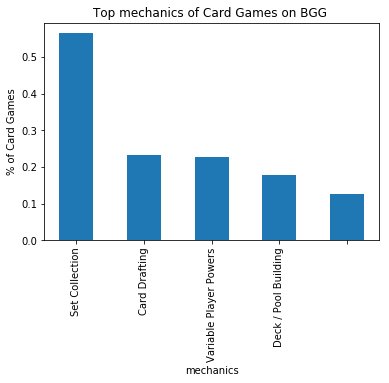

In [83]:
bar_heights = top_mechs.iloc[:,1]/total_card_games
bar_positions = np.arange(5)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.bar(bar_positions, bar_heights,0.5)
ax.set_xticklabels(top_mechs["Mechanic Name"], rotation=90)
ax.set_xlabel("mechanics")
ax.set_ylabel("% of Card Games")
plt.title("Top mechanics of Card Games on BGG ")
plt.show()

In [79]:
def max_find(df, twoD_List, spec, max_val):
    mask = bool_mask(twoD_List, spec)
    filt_df = df[mask].sort_values(by=max_val, ascending=False)
    m = filt_df.head(5)
    report = m[["names", max_val]]
    return report

newDF = pd.DataFrame(index=range(0,5), columns=[top_mechs[0]])
for mech in top_mechs[0]:
    res = max_find(card_game, mech_frame, mech, "avg_rating")
    res = res.reset_index()
    newDF[mech] = res["names"]
newDF

0,Hand Management,Set Collection,Card Drafting,Variable Player Powers,Deck / Pool Building
0,Mythic Battles: Pantheon,7 Wonders Duel,Mythic Battles: Pantheon,Mythic Battles: Pantheon,Street Masters
1,The 7th Continent,Century: Golem Edition,Street Masters,The 7th Continent,Aeon's End: War Eternal
2,BattleCON: Trials of Indines,Millennium Blades,Aeon's End: War Eternal,BattleCON: Trials of Indines,Thunderstone Quest
3,Street Masters,7 Wonders,Through the Ages: A New Story of Civilization,Fallen Land: A Post Apocalyptic Board Game,Codex: Card-Time Strategy – Deluxe Set
4,Aeon's End: War Eternal,"Myths at War (Nordic, Egyptian and Japanese)",7 Wonders Duel,Aeon's End: War Eternal,Arkham Horror: The Card Game


In [109]:
pivot = pd.DataFrame(index = mechanics, columns=mechanics, dtype=np.int8, data=0)
for mech1 in mechanics:
    for mech2 in mechanics:
        for items in mech_frame:
            if (mech1 in items and mech2 in items):
                pivot.loc[mech2][mech1] += 1
pivot

,Action Point Allowance System,Auction/Bidding,Card Drafting,Co-operative Play,Grid Movement,Hand Management,Modular Board,Storytelling,Variable Player Powers,Set Collection,...,none,Pattern Recognition,Paper-and-Pencil,Stock Holding,Roll / Spin and Move,Time Track,Singing,Line Drawing,Hex-and-Counter,Area Enclosure
Action Point Allowance System,54,3,12,6,2,44,6,0,15,9,...,0,0,0,1,0,0,0,0,0,0
Auction/Bidding,3,96,19,0,0,41,0,0,8,33,...,0,0,0,3,0,0,0,0,0,0
Card Drafting,12,19,63,19,4,-65,7,4,55,119,...,0,0,1,4,0,2,0,0,0,0
Co-operative Play,6,0,19,100,3,52,6,10,33,5,...,0,0,2,0,0,0,0,0,0,0
Grid Movement,2,0,4,3,23,16,5,1,14,3,...,0,0,0,0,0,1,0,0,1,0
Hand Management,44,41,-65,52,16,24,34,9,-86,-63,...,0,3,3,9,2,1,1,0,1,1
Modular Board,6,0,7,6,5,34,56,1,18,7,...,0,1,0,1,0,0,0,0,1,0
Storytelling,0,0,4,10,1,9,1,31,4,1,...,0,0,1,0,0,0,0,0,0,0
Variable Player Powers,15,8,55,33,14,-86,18,4,-7,18,...,0,0,0,3,1,1,0,0,1,0
Set Collection,9,33,119,5,3,-63,7,1,18,71,...,0,1,0,3,0,2,1,0,0,1
